# K-Means
## 1. 비지도학습

- 종속변수 없이 컴퓨터가 데이터의 패턴/규칙을 찾아내는 방법
- 분석가 주관 상당히 반영
- 학습 끝난 후 평가 어려움

## 2. KMeans 클러스터링

- 각 군집의 평균을 활용하여 K개의 군집(cluster)으로 묶는 알고리즘
- 데이터 전처리 단계에서 라벨링을 위해 사용하기도 함

## 3. 기본 아이디어

- 같은 군집 내부 데이터는 서로 가깝게 위치
- 서로 다른 군집 간 데이터는 멀리위치
- 거리 기준으로 보통 유클리드 거리 사용

## 4. KMeans의 수행 절차
### 1. 초기 클러스터링의 수 K를 정의(하이퍼파라미터)
### 2. K개 클러스터의 가상의 중심점들을 선택
### 3. 각 측정값을 가장 가까운 중심점의 클러스터에 할당
### 4. 새로운 클러스터의 중심 계산
### 6. 클러스터 재분류
- 재정의 된 중심값 기준에서 거리 기반
- 경계가 유지되면 종료

## 5. K평균 클러스터링의 특징
- 거리 기반 분류
    - 유클리디안 거리 측정
    - 중심점과의 거리 최소화
- 반복 작업
    - 초기 실수를 보완
    - 반복 수행하며 초기 오류 회복
    - 최적의 결과를 도출

## 6. 장점
- 짧은 계산 시간
    - 간단한 알고리즘을 통한 시간 최소화
    - 대규모 시스템 적용 가능
- 탐색적 방법
    - 사전정보 필요없음
    - 대용량 데이터에 대한 탐색적인 기법
- 다양한 데이터에 적용
    - 거의 모든 형태의 데이터에 적용 가능
    - 관찰할 데이터 간 거리를 데이터형에 맞게만 정의하면 분석 가능
- 분석방법 적용이 쉬움
    - 사전에 변수의 역할 정의가 필요 없음
    - 데이터 간 거리만이 필요

## 7. 단점
- 가중치와 거리 정의 필요
    - 거리 정의하는 것의 어려움
    - 변수에 대한 가중치 결정하는 것의 어려움
- 초기 클러스터링 수 결정
    - 사전에 정의된 클러스터링 수(K)를 기준으로 찾기 때문에 초기 설정값이 좋아야됨
- 결과해석이 어려움
    - 주어진 목적이 존재해야 됨
    

## 8. 활용 예시
- 고객 세분화
- 지역, 입지 유형 분류
- EDA
- 특성 기반 그룹화


## 9. 실무 주의점
- 변수 스케일 차이가 크면 반드시 표준화 필요
- k 선택 시 Elbow, Silhouette 지표 활용
- 구조 탐색 용도로 사용


## 10. 패키지 가져오기

In [ ]:
from hossam import load_data
from sklearn.cluster import KMeans

from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from scipy.spatial import ConvexHull
from sklearn.preprocessing import MinMaxScaler, StandardScaler

my_dpi = 200

c:\Users\wodyd\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📦 아이티윌 이광호 강사가 제작한 라이브러리를 사용중입니다.
📚 자세한 사용 방법은 https://py.hossam.kr 을 참고하세요.
📧 Email: leekh4232@gmail.com
🎬 Youtube: https://www.youtube.com/@hossam-codingclub
📝 Blog: https://blog.hossam.kr/
🔖 Version: 0.4.16

✅ 시각화를 위한 한글 글꼴(NotoSansKR-Regular)이 자동 적용되었습니다.


In [3]:
origin = load_data('game_usage')
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print(origin.info())
origin.head()

게임 이용시간(time spent)과 레벨(game level)에 대한 가상 데이터
데이터셋 크기: (100, 2)
열 개수: 2
행 개수: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time spent  100 non-null    int64
 1   game level  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB
None


,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


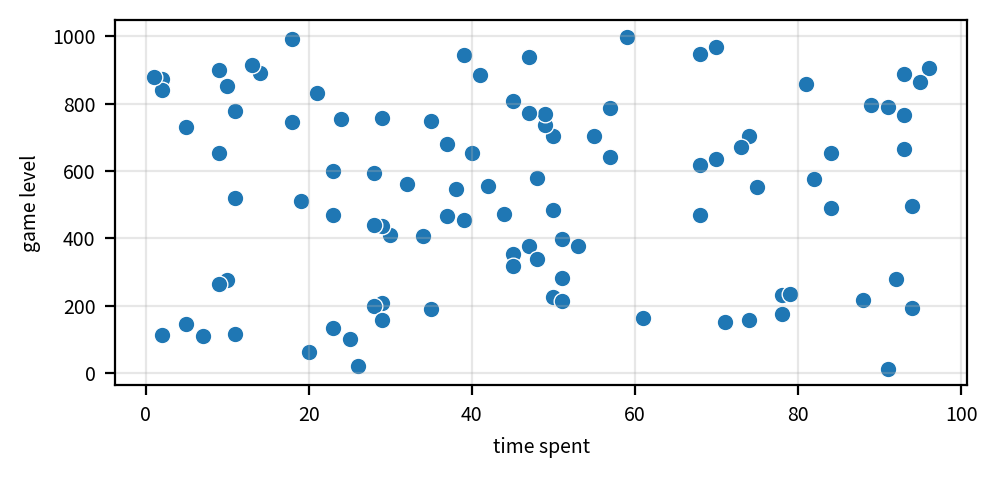

In [4]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.scatterplot(data=origin, x = 'time spent', y = 'game level')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) 

# 출력
plt.tight_layout()
plt.show()
plt.close()

## 11. 머신러닝 학습시키기
- 4가지 분류(오래+잘함, 오래+못함, 잠깐+잘함, 잠깐+못함)

In [5]:
# 모델 객체 생성
# -> random_state는 실행할 때마다 같은 결과가 나오도록 고정하는 용도
#    생략시 매 실행마다 결과가 달라짐
estimator = KMeans(n_clusters = 4, random_state = 52)

# 모델 학습
estimator.fit(origin)

# 예측
cluster_pred = estimator.predict(origin)
cluster_pred

array([1, 3, 1, 1, 2, 1, 0, 0, 2, 0, 1, 3, 2, 3, 1, 2, 1, 2, 1, 3, 3, 1,
       2, 3, 2, 1, 3, 2, 0, 3, 3, 1, 0, 2, 1, 3, 0, 2, 2, 1, 0, 1, 1, 3,
       1, 3, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2, 3, 1, 0, 2, 3, 3, 3, 0, 1,
       0, 2, 0, 3, 1, 0, 2, 2, 1, 2, 1, 1, 2, 3, 2, 3, 0, 1, 2, 3, 1, 0,
       2, 2, 1, 3, 0, 3, 1, 1, 0, 1, 2, 0], dtype=int32)

## 12. 결과 정리

In [6]:
df = origin.copy()
df['그룹번호'] = cluster_pred
df

,time spent,game level,그룹번호
0,39,944,1
1,55,705,3
2,29,757,1
3,59,999,1
4,7,109,2
5,35,749,1
6,11,520,0
7,30,410,0
8,50,225,2
9,23,470,0


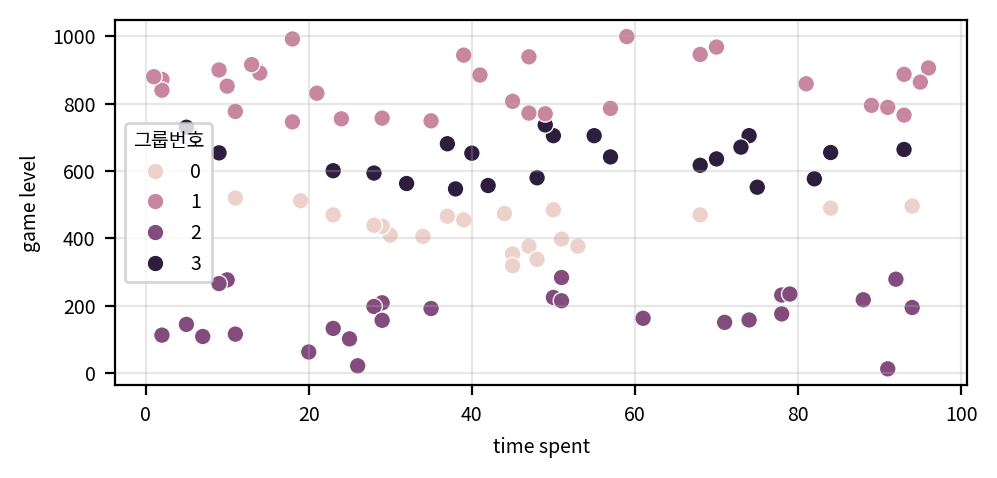

In [7]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.scatterplot(data=df, x = 'time spent', y = 'game level', hue = '그룹번호')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) 

# 출력
plt.tight_layout()
plt.show()
plt.close()

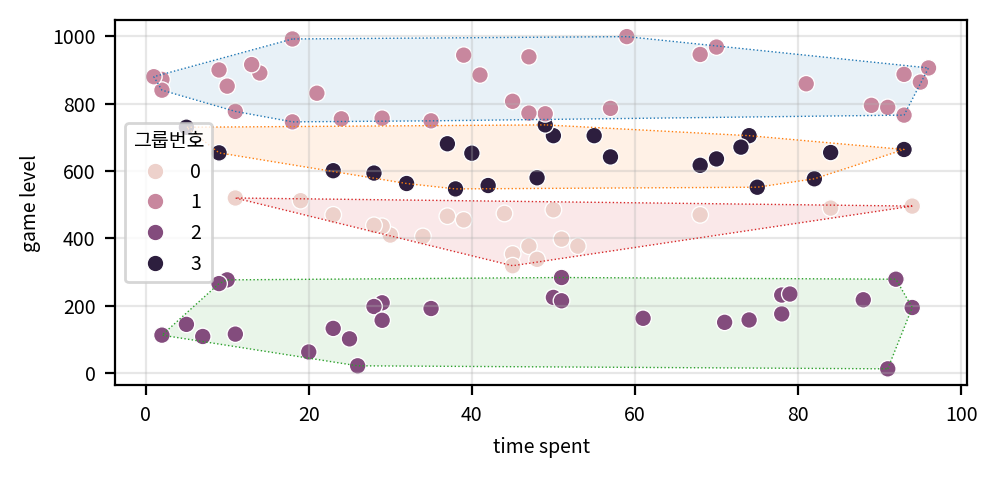

In [8]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 군집별 값의 종류별로 반복
for c in df['그룹번호'].unique():

    df_c = df.loc[df['그룹번호'] == c, ['time spent', 'game level']]

    try:
        # 외각선 좌표 계산
        hull = ConvexHull(df_c)

        # 마지막 좌표 이후에 첫 번쨰 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot(# type: ignore
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth = 0.5, linestyle = ':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha = 0.1)
    except:
        pass
# box 그리기
sb.scatterplot(data=df, x = 'time spent', y = 'game level', hue = '그룹번호')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) 

# 출력
plt.tight_layout()
plt.show()
plt.close()


## 13. 데이터 표준화 적용
### 데이터 스케일링에 대한 군집화
#### 1. Standard Scaler

In [9]:
scaler = StandardScaler()
sdf = DataFrame(scaler.fit_transform(origin), columns = origin.columns)
sdf

,time spent,game level
0,-0.250733,1.474805
1,0.326494,0.606546
2,-0.611500,0.795456
3,0.470801,1.674613
4,-1.405187,-1.558652
5,-0.395040,0.766393
6,-1.260881,-0.065537
7,-0.575423,-0.465154
8,0.146111,-1.137237
9,-0.827960,-0.247181


In [10]:
estimator = KMeans(n_clusters = 4) # 모델 객체 생성
estimator.fit(sdf) # 모델 학습
cluster = estimator.predict(sdf) # 예측
sdf['그룹번호'] = cluster
sdf

,time spent,game level,그룹번호
0,-0.250733,1.474805,3
1,0.326494,0.606546,3
2,-0.611500,0.795456,1
3,0.470801,1.674613,3
4,-1.405187,-1.558652,0
5,-0.395040,0.766393,3
6,-1.260881,-0.065537,1
7,-0.575423,-0.465154,0
8,0.146111,-1.137237,0
9,-0.827960,-0.247181,0


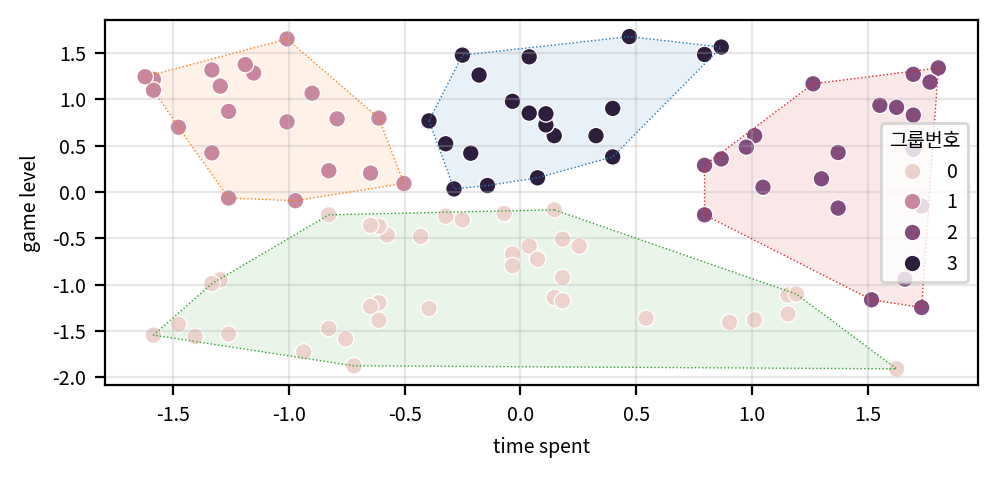

In [11]:
vdf = sdf.copy()
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 군집별 값의 종류별로 반복
for c in vdf['그룹번호'].unique():
    # 값의 정류별로 데이터프레임을 나눔
    df_c = vdf.loc[vdf['그룹번호'] == c, ['time spent', 'game level']]

    try:
        # 외각선 좌표 계산
        hull = ConvexHull(df_c)

        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot(# type: ignore
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth = 0.5, linestyle = ':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha = 0.1)
    except:
        pass
# box 그리기
sb.scatterplot(data=vdf, x = 'time spent', y = 'game level', hue = '그룹번호')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) 

# 출력
plt.tight_layout()
plt.show()
plt.close()


#### 2. MinMax Scaler

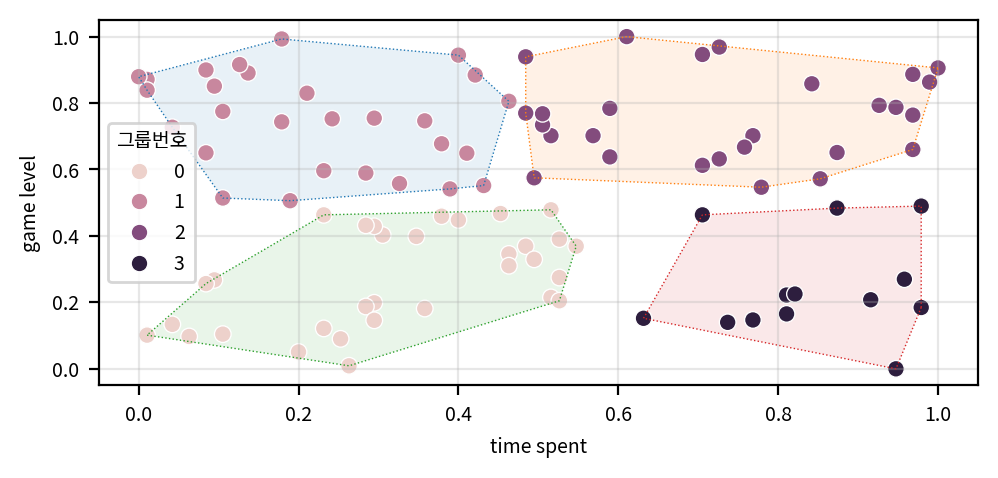

In [13]:
scaler = MinMaxScaler()
mdf = DataFrame(scaler.fit_transform(origin), columns = origin.columns)

# 모델 객체 생성
estimator = KMeans(n_clusters = 4)

# 모델 학습
estimator.fit(mdf)

# 예측
cluster = estimator.predict(mdf)
mdf['그룹번호'] = cluster

vdf = mdf.copy()
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 군집별 값의 종류별로 반복
for c in vdf['그룹번호'].unique():
    # 값의 정류별로 데이터프레임을 나눔
    df_c = vdf.loc[vdf['그룹번호'] == c, ['time spent', 'game level']]

    try:
        # 외각선 좌표 계산
        hull = ConvexHull(df_c)

        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot(# type: ignore
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth = 0.5, linestyle = ':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha = 0.1)
    except:
        pass
# box 그리기
sb.scatterplot(data=vdf, x = 'time spent', y = 'game level', hue = '그룹번호')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) 

# 출력
plt.tight_layout()
plt.show()
plt.close()
